# 1.0 Purpose
The purpose of this notebook is to use Embedding for a Natural Language Processing (NLP) task with TensorFlow on the Text Generation from Eminem.

# 2.0 Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
print(tf.__version__)

## Helper Functions

### decode_review

In [ ]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])



### get_training_metrics

In [ ]:
def get_training_metrics(history):
  
  # This is needed depending on if you used the pretrained model or you trained it yourself
  if not isinstance(history, pd.core.frame.DataFrame):
    history = history.history
  
  acc = history['binary_accuracy']
  val_acc = history['val_binary_accuracy']

  loss = history['loss']
  val_loss = history['val_loss']

  return acc, val_acc, loss, val_loss

### plot_train_eval

In [ ]:
def plot_train_eval(history,name='',parameters='',optimizer_name='',loss='',accuracy_metric='',epochs='',vocab_size='',embedding_dim='',max_length='',trunc_type='',oov_tok=''):
  acc, val_acc, loss_values, val_loss = get_training_metrics(history)

  acc_plot = pd.DataFrame({"training accuracy":acc, "evaluation accuracy":val_acc})
  acc_plot = sns.lineplot(data=acc_plot)
  acc_plot.set_title(f'training vs evaluation accuracy: {name} \n # parameters={parameters} \n optimizer_name={optimizer_name} \n loss={loss} \n accuracy_metric={accuracy_metric} \n epochs={epochs} \n vocab_size={vocab_size} \n embedding_dim={embedding_dim} \n max_length={max_length} \n trunc_type={trunc_type} \n oov_tok={oov_tok}')
  acc_plot.set_xlabel('epoch')
  acc_plot.set_ylabel(accuracy_metric)
  plt.savefig(f'{name} - train_acc_vs_eval_acc.jpg',bbox_inches='tight')
  plt.show()


  print("")

  loss_plot = pd.DataFrame({"training loss":loss_values, "evaluation loss":val_loss})
  loss_plot = sns.lineplot(data=loss_plot)
  loss_plot.set_title(f'training vs evaluation loss: {name} \n # parameters={parameters} \n optimizer_name={optimizer_name}  \n loss={loss} \naccuracy_metric={accuracy_metric} \n epochs={epochs} \n vocab_size={vocab_size} \n embedding_dim={embedding_dim} \n max_length={max_length} \n trunc_type={trunc_type} \n oov_tok={oov_tok}')
  loss_plot.set_xlabel('epoch')
  loss_plot.set_ylabel(loss)
  plt.savefig(f'{name} - train_loss_vs_eval_loss.jpg',bbox_inches='tight')
  plt.show()

### model_picker

In [ ]:
def model_picker(vocab_size=100,embedding_dim=16,input_length=100,model_name='model1',rnn_units=1024,max_sequence_len=100):

  if model_name=='model1':
    model = tf.keras.Sequential([
                                tf.keras.layers.Embedding(vocab_size, 100, input_length=max_sequence_len-1),
                                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
                                tf.keras.layers.Dense(vocab_size,activation='softmax')
    ])
    model_description=f'Embedding(vocab_size={vocab_size}, \n embedding_dim={embedding_dim}, \n input_length={max_length}), \n GRU({rnn_units},return_sequence=True,stateful=True,recurrent_initializer=glorot_uniform) \n Flatten, \n Dense({vocab_size},softmax)'
  return model,model_description

### loss_picker

In [ ]:
def loss_picker(loss_name='categorical_crossentropy'):

  if loss_name=='categorical_crossentropy':
    loss='categorical_crossentropy'
  return loss

# 3.0 Import Eminem Lyrics dataset from Kaggle

## 3.0.1 [Find your Kaggle Account and click the **Create New API Token** to download the json file](https://www.kaggle.com/stevensmiley/account?isEditing=False)

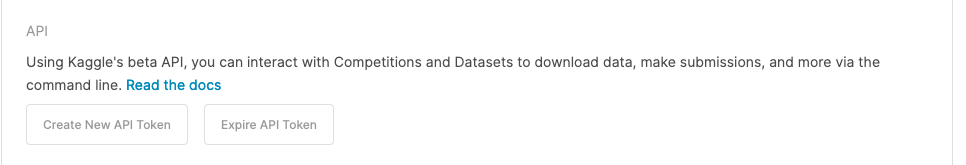

## 3.0.2 **Upload** kaggle.json file

In [ ]:
from google.colab import files
uploaded = files.upload()

## 3.0.3 Pick the **kaggle.json** file from your Kaggle download

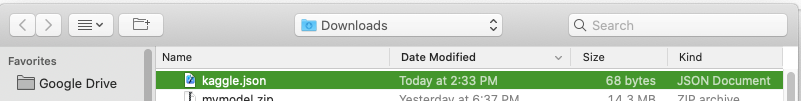

## 3.0.4 install kaggle with pip

In [ ]:
! pip install -q kaggle

## 3.0.5 create kaggle directory

In [ ]:
! mkdir ~/.kaggle 

## 3.0.6 copy the kaggle.json file to the kaggle directory

In [ ]:
! cp kaggle.json ~/.kaggle/

## 3.0.7 Set 600 permissions to a kaggle.json file so you (owner) has full read and write access to the file, while no other user can access the file.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

## 3.0.8 List the kaggle datasets

In [ ]:
! kaggle datasets list

## 3.0.9 download the dataset

In [ ]:
!kaggle datasets download -d thaddeussegura/eminem-lyrics-from-all-albums

## 3.0.9 Create **train** directory

In [ ]:
! mkdir train

## 3.0.10 Create **test** directory

In [ ]:
! mkdir test

## 3.0.11 **new_dir** 
helper function for making directories

In [ ]:
def new_dir(path):
  try:
    os.mkdir(path)
  except:
    print(f'Already have: {path}')
    pass

## 3.0.12 get_training_metrics
helper function for getting history metrics

In [ ]:
def get_training_metrics(history):
  
  # This is needed depending on if you used the pretrained model or you trained it yourself
  if not isinstance(history, pd.core.frame.DataFrame):
    history = history.history
  
  acc = history['binary_accuracy']
  val_acc = history['val_binary_accuracy']

  loss = history['loss']
  val_loss = history['val_loss']

  return acc, val_acc, loss, val_loss

## 3.0.13 plot_train_eval
helper function for plotting history metrics

In [ ]:
def plot_train_eval(history,name='',parameters='',num_images_per_epoch_train='',num_images_per_epoch_val='',batch_size=''):
  acc, val_acc, loss, val_loss = get_training_metrics(history)

  acc_plot = pd.DataFrame({"training accuracy":acc, "evaluation accuracy":val_acc})
  acc_plot = sns.lineplot(data=acc_plot)
  acc_plot.set_title(f'training vs evaluation accuracy: {name} \n # parameters={parameters} \n num_images_per_epoch_train={num_images_per_epoch_train} \n num_images_per_epoch_val={num_images_per_epoch_val} \n batch_size={batch_size}')
  acc_plot.set_xlabel('epoch')
  acc_plot.set_ylabel('binary_crossentropy')
  plt.savefig(f'{name} - train_acc_vs_eval_acc.jpg',bbox_inches='tight')
  plt.show()


  print("")

  loss_plot = pd.DataFrame({"training loss":loss, "evaluation loss":val_loss})
  loss_plot = sns.lineplot(data=loss_plot)
  loss_plot.set_title(f'training vs evaluation loss: {name} \n # parameters={parameters} \n num_images_per_epoch_train={num_images_per_epoch_train} \n num_images_per_epoch_val={num_images_per_epoch_val} \n batch_size={batch_size}')
  loss_plot.set_xlabel('epoch')
  loss_plot.set_ylabel('loss')
  plt.savefig(f'{name} - train_loss_vs_eval_loss.jpg',bbox_inches='tight')
  plt.show()






In [ ]:
cols=['filename','model_name',
      'optimizer',
      'loss',
      'accuracy_metric',
      'batch_size','img_size',
      'steps_per_epoch','epochs','validation_steps',
      'num_images_per_epoch_train','num_images_per_epoch_val',
      'data_augmentation',
      'F1_score_dog','F1_score_cat',
      'Precision_dog','Precision_cat',
      'Recall_dog','Recall_cat',
      'misclassified_dogs','misclassified_cats']
df_metrics=pd.DataFrame(columns=cols)
df_metrics

In [ ]:
!unzip eminem-lyrics-from-all-albums.zip  

In [ ]:
f=open('/content/eminem_lyrics/ALL_eminem.txt','r')
data=f.read()
f.close()

In [ ]:
data

In [ ]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])

In [ ]:
input_sequences[0:2] #notice no padding

In [ ]:

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['gangsta'])
print(tokenizer.word_index['slim'])

In [ ]:
len(set(tokenizer.word_index)) + 1

In [ ]:
len(input_sequences[0]),max_sequence_len

In [ ]:
input_sequences[0:2] #notice the pre padding

# 4.1 model1 

## Set Embedding Parameters

In [ ]:
filename='TF_LSTM_GRU_NLP_TextGeneration.ipynb'
model_name='model1'
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
optimizer_name=str(optimizer)
loss_name='categorical_crossentropy'
accuracy_metric='accuracy'
epochs=20
vocab_size = total_words
embedding_dim = 256
max_length = 100
trunc_type='pre'
oov_tok = '<OOV>'
rnn_units=1024

## Create Model

In [ ]:
loss=loss_picker(loss_name=loss_name)

In [ ]:
model1,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name,rnn_units=rnn_units,max_sequence_len=max_sequence_len)

In [ ]:
model1.compile(optimizer=optimizer, loss=loss,metrics=[accuracy_metric])

In [ ]:
model1.summary()

In [ ]:
xs.shape

In [ ]:
ys.shape

In [ ]:
history1 = model1.fit(xs,ys, epochs=epochs,verbose=1)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

In [ ]:
plot_graphs(history1, 'accuracy')

In [ ]:
seed_text = "What is my next 100 words?"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model1.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

In [ ]:
model1.save(model_name) #save model
model1=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

# 5.0 Export Models

In [ ]:
!zip -r /content/model1.zip /content/model1

# Install **rclone**
This is so you can save your checkpoints weights to your actual google drive for restoration.

In [ ]:
! curl https://rclone.org/install.sh | sudo bash

You want to create a remote configuration with rclone.  Use the default recommendations.

In [ ]:
!rclone config

# Copy Content to **Google Drive** with **rclone**
Try to copy exisiting weights to a future directory to ensure rclone is configured right

This line tests the ability to copy known weights to a directory on you **Google Drive** with **rclone**

In [ ]:
!rclone copy "/content/"  remote:"/Colab_Notebooks/GitHub/TensorFlow_Examples/Basics/Wk7/content"